# Summer 2020 -> INSY 5378 -> Data Science
## Homework 3B
### Name: Phanikrishna Karanam (UTA ID# 1001851985)

#### Assignment on Regression

__Summary__: 
We will use the California Housing Dataset to work on Regression problem. We will use two regressors to predict medianHouseValue. We will use mean squared error and R-squared as the metrics for evaluation. 

__About Dataset__: 
Most of the fields are self-explanatory, but we can find a description of some of the fields at https://developers.google.com/machine-learning/crash-course/california-housing-data-description.

In [1]:
# Point the directory the file location and supress any warning messages that arise

import os
import warnings

warnings.filterwarnings('ignore')
os.chdir('C:/MSBA/Summer 2020/2205-INSY-5378-Data Science/Assignment 3/Regression')

In [2]:
import pandas as pd
import numpy as np

# set below options to review complete DataFrame in output cells
# Note: load time and processing will be higher  
#pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', -1)

data_df = pd.read_excel('ca_housing.xlsx')
data_copy = data_df.copy()
print('Shape: ', data_df.shape)
data_df 

Shape:  (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
# we have 10 columns (9 numeric and 1 categorical) and 20640 observations
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# As seen above and below, we have null values in total_bedrooms column
print('Null values in data: \n')
print(data_df.isnull().sum(), '\n')

# Let us explore the Numeric and categorical variables 

print('Unique values in ocean_proximity: \n')
print(data_df['ocean_proximity'].value_counts())
data_df.describe().T

Null values in data: 

longitude             0  
latitude              0  
housing_median_age    0  
total_rooms           0  
total_bedrooms        207
population            0  
households            0  
median_income         0  
median_house_value    0  
ocean_proximity       0  
dtype: int64 

Unique values in ocean_proximity: 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND        5   
Name: ocean_proximity, dtype: int64


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
# Before imputing the null values, let us encode the categorical variable as imputer will fail if not
# Converting the column back to categorical to ensure its not ordinal

data_df['ocean_proximity'] = data_df['ocean_proximity'].astype('category')
data_df['ocean_proximity'] = data_df['ocean_proximity'].cat.codes.astype('category') 
data_df['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2    5   
Name: ocean_proximity, dtype: int64

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null category
dtypes: category(1), float64(4), int64(5)
memory usage: 1.4 MB


In [7]:
# using multi variate iterative imputer for imputing the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state = 337)
data_imputed = imputer.fit_transform(data_df)

data_df = pd.DataFrame(data_imputed, columns = data_df.columns)
print('No null values post Imputation:')
data_df.isnull().sum()

No null values post Imputation:


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
print(data_df.info(), '\n')

# Above imputation converted even categorical variables into floats. 
# Let us convert ocean_proximity variable back to categorical object type, as this is not ordinal and dont want to scale
# Also we will have 1 column in df (vs using dummies) for easier view 

data_df['ocean_proximity'] = data_df['ocean_proximity'].astype('category')
print(data_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households    

 - Correlation matrix shows signs of multicollinearity between similar variables like rooms, bedrooms, population, households
 - Scatter Plot Matrix also confirms signs of linear relationship between the input features (like rooms, bedrooms, population)
 - We will ignore these as numeric fields with similar ranges tend to appear correlated 

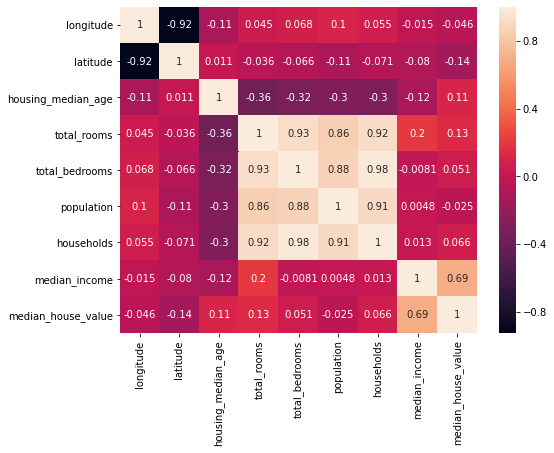

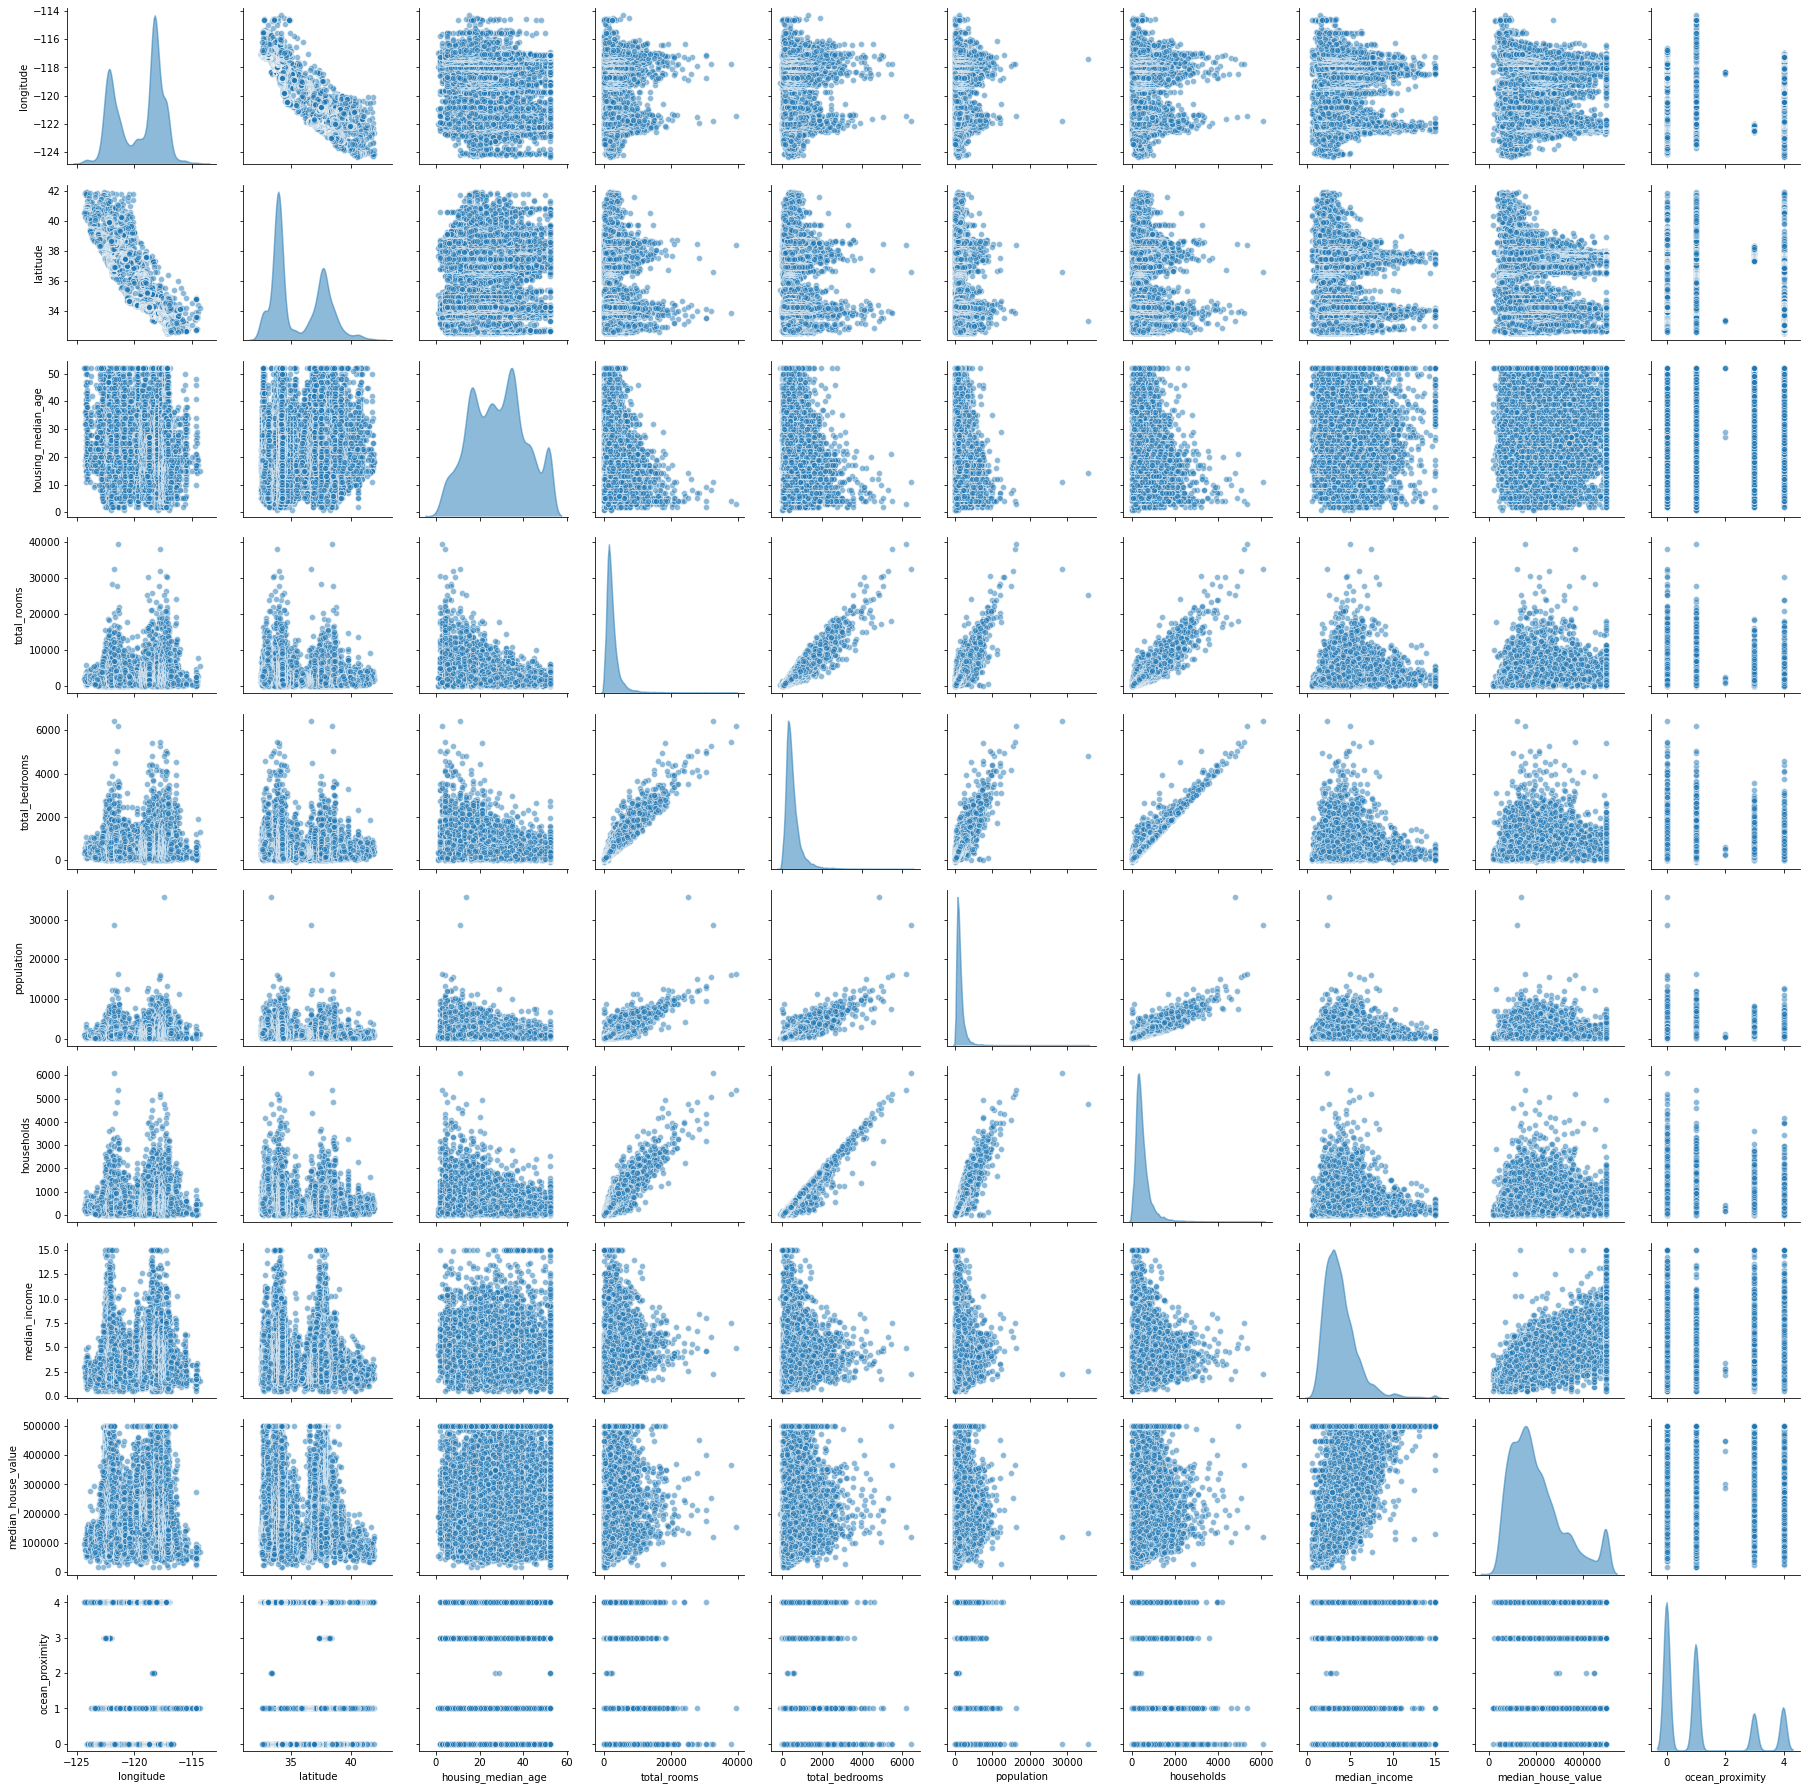

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(8,6))
sns.heatmap(data_df.corr(), annot=True)
sns.pairplot(data_df, diag_kind ='kde', diag_kws={'alpha':0.5}, plot_kws={'alpha':0.5})
plt.show()

In [10]:
# Bin the latitude and longitude columns 
# Adding +1 to encoding so that we avoid zero value. We will be using these for feature cross 

longitude_quantiles = data_df['longitude'].quantile([0.25, 0.5, 0.75, 1])
longitude_bins = [longitude_quantiles[q] for q in longitude_quantiles.keys()]
data_df['longitude_bins'] = np.digitize(data_df['longitude'], longitude_bins, right = True) + 1

latitude_quantiles = data_df['latitude'].quantile([0.25, 0.5, 0.75, 1])
latitude_bins = [latitude_quantiles[q] for q in latitude_quantiles.keys()]
data_df['latitude_bins'] = np.digitize(data_df['latitude'], latitude_bins, right = True) + 1

print(data_df['longitude_bins'].value_counts(), '\n')
print(data_df['latitude_bins'].value_counts(), '\n')
data_df

2    5198
1    5165
4    5145
3    5132
Name: longitude_bins, dtype: int64 

2    5197
1    5192
4    5157
3    5094
Name: latitude_bins, dtype: int64 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_bins,latitude_bins
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0,1,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0,1,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,1,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0,1,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0,2,4
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0,2,4
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0,2,4
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0,2,4


In [11]:
# create meta features from existing features 

# Number of people in a household
data_df['people_house'] = data_df['population'] / data_df['households'] 

# Number of rooms in a house 
data_df['rooms_house'] = data_df['total_rooms'] / data_df['households']  

# Number of bed rooms in a house 
data_df['bedrooms_house'] = data_df['total_bedrooms'] / data_df['households']  

# Ratio of living area in a house. Subtracting the bedrooms to total rooms ratio from 1 
data_df['living_area_ratio'] = 1 - (data_df['bedrooms_house'] / data_df['rooms_house'])

# create feature cross 
# Location wise -> number of rooms 
data_df['location_rooms'] = data_df['longitude_bins'] * data_df['latitude_bins'] * data_df['rooms_house']

# Location wise -> median age of a house  
data_df['location_age'] = data_df['longitude_bins'] * data_df['latitude_bins'] * data_df['housing_median_age']

# converting latitude/longitude binned columns to categorical as they are not ordinal and want to avoid scaling
data_df['longitude_bins'] = data_df['longitude_bins'].astype('category') 
data_df['latitude_bins'] = data_df['latitude_bins'].astype('category')

# dropping the original latitude and longitude columns
data_df.drop(['longitude', 'latitude'], axis = 1, inplace = True) 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null category
longitude_bins        20640 non-null category
latitude_bins         20640 non-null category
people_house          20640 non-null float64
rooms_house           20640 non-null float64
bedrooms_house        20640 non-null float64
living_area_ratio     20640 non-null float64
location_rooms        20640 non-null float64
location_age          20640 non-null float64
dtypes: category(3), float64(13)
memory usage: 2.1 MB


In [12]:
# Setup the X and y for the Regression 
features = data_df.drop('median_house_value', axis = 1)
target = data_df['median_house_value']

# let us scale only the numerical features for using them in non tree based models
# We can use the same scaled data in Tree based models as well (although tree based models dont really need scaling) 
# Note: Scaling the categorical variables (although numeric), doesnt make sense

features_cat = set(features.select_dtypes(include='category').columns)
features_num = set(features.columns) - set(features_cat)

# Found Standard Scaler marginally better over Min Max Scaler 
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#features_num_scaled = scaler.fit_transform(features[features_num])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_num_scaled = scaler.fit_transform(features[features_num])

features_num_scaled_df = pd.DataFrame(features_num_scaled, columns = features_num)
features_num_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,20640.0,-6.465442e-17,1.000024,-1.256123,-0.563809,-0.229132,0.264495,30.250330
location_rooms,20640.0,-1.006785e-16,1.000024,-1.212678,-0.469264,-0.185914,0.261470,51.969156
people_house,20640.0,6.064808e-19,1.000024,-0.229000,-0.061711,-0.024316,0.020375,119.419103
location_age,20640.0,3.574539e-16,1.000024,-1.753662,-0.768524,-0.226698,0.758441,5.290078
living_area_ratio,20640.0,-1.320609e-16,1.000024,-13.477928,-0.458804,0.168067,0.644522,16.060419
median_income,20640.0,3.734255e-16,1.000024,-1.774299,-0.688119,-0.176795,0.459306,5.858286
total_rooms,20640.0,1.475181e-16,1.000024,-1.207283,-0.544570,-0.233210,0.234803,16.815580
households,20640.0,2.139358e-16,1.000024,-1.303984,-0.574229,-0.236816,0.275843,14.601520
rooms_house,20640.0,2.704111e-16,1.000024,-1.852319,-0.399450,-0.080785,0.251961,55.163236
total_bedrooms,20640.0,2.425896e-16,1.000024,-1.542283,-0.574430,-0.244366,0.259042,14.026765


In [13]:
# one hot encode all the categorical variables before passing into the model 
features_cat_onehot = pd.get_dummies(features[features_cat], drop_first = True)
print('\nShape: ', features_cat_onehot.shape)

# Let us concatenate the scaled numeric and unscaled categorical variables
features_scaled_onehot = pd.concat([features_num_scaled_df, features_cat_onehot], axis = 1)
features_scaled_onehot


Shape:  (20640, 10)


,population,location_rooms,people_house,location_age,living_area_ratio,median_income,total_rooms,households,rooms_house,total_bedrooms,housing_median_age,bedrooms_house,ocean_proximity_1.0,ocean_proximity_2.0,ocean_proximity_3.0,ocean_proximity_4.0,latitude_bins_2,latitude_bins_3,latitude_bins_4,longitude_bins_2,longitude_bins_3,longitude_bins_4
0,-0.974429,-0.026126,-0.049597,0.216615,1.138770,2.344766,-0.804819,-0.977033,0.628559,-0.970982,0.982143,-0.152249,0,0,1,0,0,0,1,0,0,0
1,0.861439,-0.166239,-0.092512,-0.768524,0.981100,2.332238,2.045890,1.669961,0.327041,1.348967,-0.607019,-0.261069,0,0,1,0,0,0,1,0,0,0
2,-0.820777,0.218794,-0.025843,0.758441,1.431218,1.782699,-0.535746,-0.843637,1.155620,-0.826134,1.856182,-0.048233,0,0,1,0,0,0,1,0,0,0
3,-0.766028,-0.245271,-0.050329,0.758441,0.490197,0.932968,-0.624215,-0.733781,0.156966,-0.719279,1.856182,-0.049044,0,0,1,0,0,0,1,0,0,0
4,-0.759847,-0.158028,-0.085616,0.758441,0.701935,-0.012881,-0.462404,-0.629157,0.344711,-0.612423,1.856182,-0.032235,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.512592,0.557393,-0.049110,0.659927,-0.197747,-1.216128,-0.444985,-0.443449,-0.155023,-0.389214,-0.289187,0.077262,1,0,0,0,0,0,1,1,0,0
20636,-0.944405,0.958797,0.005021,-0.029670,-0.036465,-0.691593,-0.888704,-1.008420,0.276881,-0.921116,-0.845393,0.459606,1,0,0,0,0,0,1,1,0,0
20637,-0.369537,0.617529,-0.071735,-0.128184,-0.035865,-1.142593,-0.174995,-0.174042,-0.090318,-0.125637,-0.924851,0.049515,1,0,0,0,0,0,1,1,0,0
20638,-0.604429,0.664098,-0.091225,-0.029670,-0.116697,-1.054583,-0.355600,-0.393753,-0.040211,-0.306104,-0.845393,0.158121,1,0,0,0,0,0,1,1,0,0


In [14]:
# Split the data for training and testing with test size of 20%

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_scaled_onehot, target, test_size = 0.20, random_state = 32)

print('x_train shape :', x_train.shape)
print('x_test shape  :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape  :', y_test.shape)

x_train shape : (16512, 22)
x_test shape  : (4128, 22)
y_train shape : (16512,)
y_test shape  : (4128,)


Function to report model performance metrics on both train and test sets: 
- Score both datasets to determine model R-Square 
- Predict for target predictions on both datasets to evalaute model MSE

In [15]:
def report_metrics(x_train, y_train, x_test, y_test, model):
    print(' - R-Squared on Training set: {:.3f}'.format(model.score(x_train, y_train)))
    print(' - R-Squared on Test set: {:.3f}\n'.format(model.score(x_test, y_test)))

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(' - MSE on Training set: {:.3f}'.format(mean_squared_error(y_train, train_pred)))
    print(' - MSE on Test set: {:.3f}\n'.format(mean_squared_error(y_test, test_pred)))

Build baseline models to check the model accuracy with the preprocessed data
 - Fit on the train data
 - Report the model performance metrics on both train and test sets (R-Square and MSE)
 - Append to the baseline model list 
 - Return all the built base line models

In [16]:
def models_baseline(x_train, y_train, x_test, y_test, models): 
    base_models = []
    for model_name, model, parameter in models:               
        model_base = model
        model_base.fit(x_train, y_train)
        
        # Report Model performance metrics
        print('{}:'.format(model_name))
        report_metrics(x_train, y_train, x_test, y_test, model_base)
        
        # Append the built models into a list for future reference
        base_models.append(model_base)
    return(base_models)

 - Import all necessary libraries and instantiate relevant models
 - Setup parameter space -> these will be used later for fine tuning (using hyper parameters), once baseline model is built

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Model instantiator 
model_linreg = LinearRegression(n_jobs = -1)
model_eln = ElasticNet(random_state = 337, max_iter = 10000)
model_rfr = RandomForestRegressor(n_jobs = -1, random_state = 337)
model_xgb = XGBRegressor(n_jobs = -1, random_state = 337, verbosity = 0)

# Model parameters
linreg_param = {} # no parameters to tune

eln_param = {'alpha': np.linspace(0.1,1,30), 'l1_ratio': np.linspace(0, 1, 10)}

rfr_param = {'n_estimators': list(range(10,101,10)), 'max_features': list(range(4,23,4)), 'oob_score': [True, False],
            'max_depth': list(range(3,8,1))}

xgb_param = {'n_estimators': list(range(5,16,1)), 'learning_rate': np.linspace(0.01,0.5,10),
             'max_depth': list(range(3,6,1))}

# Models parameter has below: 
  # Model name - text 
  # Model instantiator 
  # Model parameters (for hyper tuning)

models = [('Linear Regression', model_linreg, model_linreg), ('Elastic Net', model_eln, eln_param),
          ('Random Forest Regressor', model_rfr, rfr_param), ('XGBoost Regressor', model_xgb, xgb_param)]

In [18]:
# Build the necessary models by calling models_baseline function
# Pass the X and y values for both train and test along with models
    
print('Summary for Baseline models: \n')
base_models = models_baseline(x_train, y_train, x_test, y_test, models)

Summary for Baseline models: 

Linear Regression:
 - R-Squared on Training set: 0.659
 - R-Squared on Test set: 0.624

 - MSE on Training set: 4505192496.614
 - MSE on Test set: 5141775669.738

Elastic Net:
 - R-Squared on Training set: 0.542
 - R-Squared on Test set: 0.546

 - MSE on Training set: 6057513658.321
 - MSE on Test set: 6208989592.964

Random Forest Regressor:
 - R-Squared on Training set: 0.968
 - R-Squared on Test set: 0.765

 - MSE on Training set: 427921427.878
 - MSE on Test set: 3217528213.877

XGBoost Regressor:
 - R-Squared on Training set: 0.904
 - R-Squared on Test set: 0.757

 - MSE on Training set: 1268002307.055
 - MSE on Test set: 3317304609.435



In [30]:
# Lets review the bias and coefficients of the elastic net model  

model_names = ['Linear Regression', 'Elastic Net']
for model in zip (model_names, base_models[:2]):
    print('{} model: \n - Number of features used: {}'.format(model[0], np.sum(model[1].coef_ != 0)))
    print(' - Intercept: {} \n - Coefficients:\n  {}\n'.format(model[1].intercept_, model[1].coef_))

# let us look at the depths of the trees used in Random Forest as this could be one of the reason for overfitting
# Need to explore on how to check the tree depth on XGBoost
print('Random Forest Average Tree depth:', 
      round(np.mean([estimator.tree_.max_depth for estimator in base_models[2].estimators_])))

# We need to prune the random forest trees to avoid overfitting. Same will be the case with XGBoost 

Linear Regression model: 
 - Number of features used: 22
 - Intercept: 157361.02093390736 
 - Coefficients:
  [-53616.13779952 -13784.25266526   7123.11623437 -17450.98778325
 -19422.95415397  76576.2753337    7407.13708241  54178.20425446
  27603.23373106  -4358.90130535  24319.696456   -10542.97365677
 -55815.19727128 193734.94603082   9271.58978126  21711.72035954
  53035.33695087  51210.41727023  50456.22247172  19526.90658775
  43788.41200463  35184.40097666]

Elastic Net model: 
 - Number of features used: 22
 - Intercept: 213797.89643236197 
 - Coefficients:
  [-9.35521924e+03 -7.55226652e+03 -1.54007643e+03 -5.58992974e+03
  1.03150073e+03  4.87408455e+04  5.17288774e+03  5.56440429e+03
  7.29722767e+03  4.61725186e+03  1.25535137e+04 -3.78364316e+02
 -2.24700835e+04  2.23435916e+01  5.25132868e+03  5.91015013e+03
  6.88235107e+03  6.61311066e+01 -4.68405082e+03 -7.89455964e+03
  6.90206100e+03 -6.16212137e+03]

Random Forest Average Tree depth: 35


__Observations on Baseline models__: 
 - Linear Regression and ElasticNet are quick to train and predict, however low on R-Squared and high on MSE 
 - There is no point in trying Ridge and Lasso as Linear Regression accuracies are already very low
 - Tree based Random Forest and XGBoost regressors are performing better than the linear models, however have high overfitting 
   - MSE is still high but lower than linear models 

Function for tuning hyper parameters on various models using randomized search cross validation:
 - Perform a Randomized Search 5 fold cross validation on the training dataset
 - Once the best parameters are determined, call the report metrics function to score (for R-Squared) and predict (for MSE)
   on both train and test datasets 
 - Return the tuned models list 

In [31]:
def models_tuned(x_train, y_train, x_test, y_test, models): 
    tuned_models = []
    for model_name, model, parameter in models: 
        if model_name in ['Linear Regression']:   # no tunable parameters in linear regression
            continue 
        model_cv = RandomizedSearchCV(estimator = model, param_distributions = parameter, cv = 5, random_state = 32)
        model_cv.fit(x_train, y_train)
        
        # Report Model performance metrics
        print('{}:'.format(model_name))
        print("Tuned best Hyper Parameters: \n{}".format(model_cv.best_params_))
        report_metrics(x_train, y_train, x_test, y_test, model_cv)
        
        # Append the built models into a list for future reference
        tuned_models.append(model_cv)
    return(tuned_models)

In [32]:
# Tune all the models as per hyper parameters defined previously by calling models_tuned function 
# Linear Regression model will not be tuned as there are no parameters available for tuning 

print('Summary for Hyper Parameters tuned models: \n')
tuned_models = models_tuned(x_train, y_train, x_test, y_test, models)

Summary for Hyper Parameters tuned models: 

Elastic Net:
Tuned best Hyper Parameters: 
{'l1_ratio': 1.0, 'alpha': 0.1310344827586207}
 - R-Squared on Training set: 0.659
 - R-Squared on Test set: 0.624

 - MSE on Training set: 4505192909.445
 - MSE on Test set: 5141533692.098

Random Forest Regressor:
Tuned best Hyper Parameters: 
{'oob_score': True, 'n_estimators': 40, 'max_features': 16, 'max_depth': 7}
 - R-Squared on Training set: 0.772
 - R-Squared on Test set: 0.736

 - MSE on Training set: 3009604121.281
 - MSE on Test set: 3604274395.627

XGBoost Regressor:
Tuned best Hyper Parameters: 
{'n_estimators': 13, 'max_depth': 5, 'learning_rate': 0.2822222222222222}
 - R-Squared on Training set: 0.787
 - R-Squared on Test set: 0.755

 - MSE on Training set: 2816460787.207
 - MSE on Test set: 3356236097.249



__Observations on hyper parameter tuned models__: 
 - No parameters available to tune Linear Regression model
 - ElasticNet has chosen L1 penalty = 1 (Lasso model) as best fit parameter and overall R-Squared has improved by 7%
 - Overfitting on Tree based models were controlled and final tuned models were generalized
   - However couldn't improve on R-Squared value
 - Considering R-Squared and MSE values, XGBoost Regressor is the best fit model
 
__Note__: 
 - Linear models were very quick to train and predict 
 - Random Forest was slower to train and predict
 - XGBoost was faster compared to Random Forest
 - MSE values appear to be very large (USD 3.35 Billion). If we look at RMSE, they appear to be around USD 60,000
   - I'm not sure if its common for this dataset to have this large values as MSE or RMSE
   - Need to explore on how to reduce MSE further 
 
__Linear Regression__:

Baseline: 
 - R-Squared on Training set: 0.659
 - R-Squared on Test set: 0.624

 - MSE on Training set: 4505192496.614
 - MSE on Test set: 5141775669.738

Tuned: Not Applicable 

__Elastic Net__:

Baseline:
 - R-Squared on Training set: 0.542
 - R-Squared on Test set: 0.546

 - MSE on Training set: 6057513658.321
 - MSE on Test set: 6208989592.964

Tuned: 
 - R-Squared on Training set: 0.659
 - R-Squared on Test set: 0.624

 - MSE on Training set: 4505192909.445
 - MSE on Test set: 5141533692.098

__Random Forest Regressor__:

Baseline: 
 - R-Squared on Training set: 0.968
 - R-Squared on Test set: 0.765

 - MSE on Training set: 427921427.878
 - MSE on Test set: 3217528213.877

Tuned: 
 - R-Squared on Training set: 0.772
 - R-Squared on Test set: 0.736

 - MSE on Training set: 3009604121.281
 - MSE on Test set: 3604274395.627

__XGBoost Regressor__:

Baseline: 
 - R-Squared on Training set: 0.904
 - R-Squared on Test set: 0.757

 - MSE on Training set: 1268002307.055
 - MSE on Test set: 3317304609.435

Tuned: 
 - R-Squared on Training set: 0.787
 - R-Squared on Test set: 0.755

 - MSE on Training set: 2816460787.207
 - MSE on Test set: 3356236097.249